In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Data_for_UCI_named.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.shape

(10000, 14)

In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df["stabf"].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
x = df.drop(columns ="stabf")
y = df["stabf"]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=0)
y_train.value_counts()

unstable    4478
stable      2522
Name: stabf, dtype: int64

In [10]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 175.4 kB/s eta 0:00:00


In [12]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [14]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix

In [16]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
accuracy_rf

0.9996666666666667

In [17]:
lg=LGBMClassifier()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
accuracy_lg = accuracy_score(y_test, lg_pred)
accuracy_lg

1.0

In [19]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
xg_pred = xg.predict(x_test)
accuracy_xg = accuracy_score(y_test, xg_pred)
accuracy_xg

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['stable' 'unstable']

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

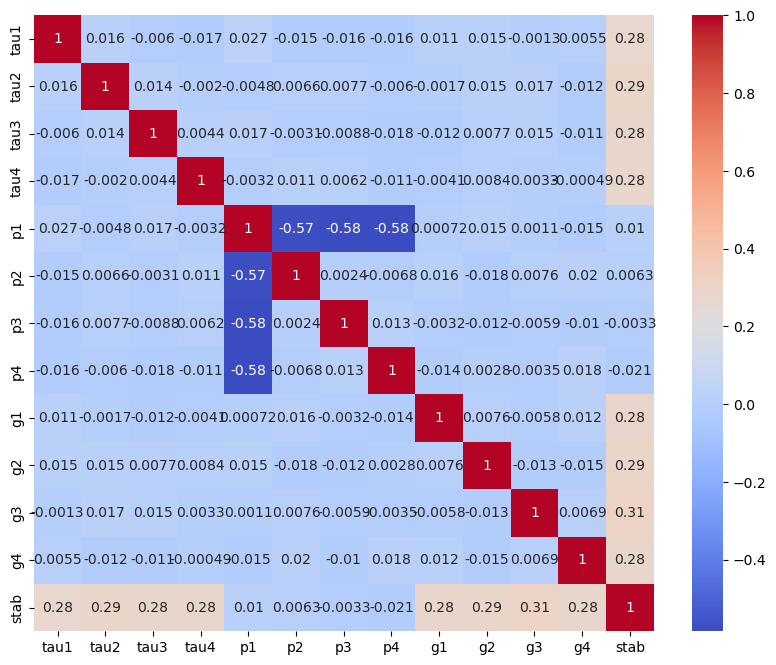

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')